# **Feature engineering notebook**

## Objectives

* Engineering features for Regression model.

## Inputs

* inputs/datasets/cleaned/TrainSetCleaned.csv
* inputs/datasets/cleaned/TestSetCleaned.csv

## Outputs

* Generate a list with to the engineer.




---

# Install requirements

In [1]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 15.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 60.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 78.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

# Load cleaned Train and Test data sets

In [3]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,2.883272,Av,48,Unf,1774,774,Unf,2007.0,...,11694,90.0,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.000000,No,0,Unf,894,308,Unf,1962.0,...,6600,60.0,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.000000,No,713,ALQ,163,432,Unf,1921.0,...,13360,80.0,0.0,0,7,5,876,1921,2006,163500


In [4]:
vars_with_missing_data = TrainSet.columns[TrainSet.isna().sum() > 0].to_list()
vars_with_missing_data

[]

In [5]:
test_set_path = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set_path)
TestSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,2515,0.0,4.0,No,1219,Rec,816,484,Unf,1975.0,...,32668,69.0,0.0,0,3,6,2035,1957,1975,200624
1,958,620.0,3.0,No,403,BLQ,238,240,Unf,1941.0,...,9490,79.0,0.0,0,7,6,806,1941,1950,133000
2,979,224.0,3.0,No,185,LwQ,524,352,Unf,1950.0,...,7015,69.0,161.0,0,4,5,709,1950,1950,110000


In [6]:
vars_with_missing_data = TrainSet.columns[TrainSet.isna().sum() > 0].to_list()
vars_with_missing_data

[]

# Explore data

In [7]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

# Investigate transformer potential
* We investigate which transformer is most optimal for the distribution shape.

In [8]:
# Code based on CI walkthrough project 02 (Chrunometer)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions
    """
    print("Starting feature engineering analysis...")
    check_missing_values(df)
    print("No missing values found.")
    
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    print(f"Analysis type: {analysis_type}")
    
    list_column_transformers = define_list_column_transformers(analysis_type)
    print(f"Transformers defined: {list_column_transformers}")

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        print(f"Processing column: {column}")
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    print("Feature engineering analysis completed.")
    return df_feat_eng



In [10]:
ts_corr_pearson, ts_corr_spearman, pps_matrix = CalculateCorrAndPPS(TrainSet)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.058  0.106  0.0  0.0  0.0  0.074  0.618




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



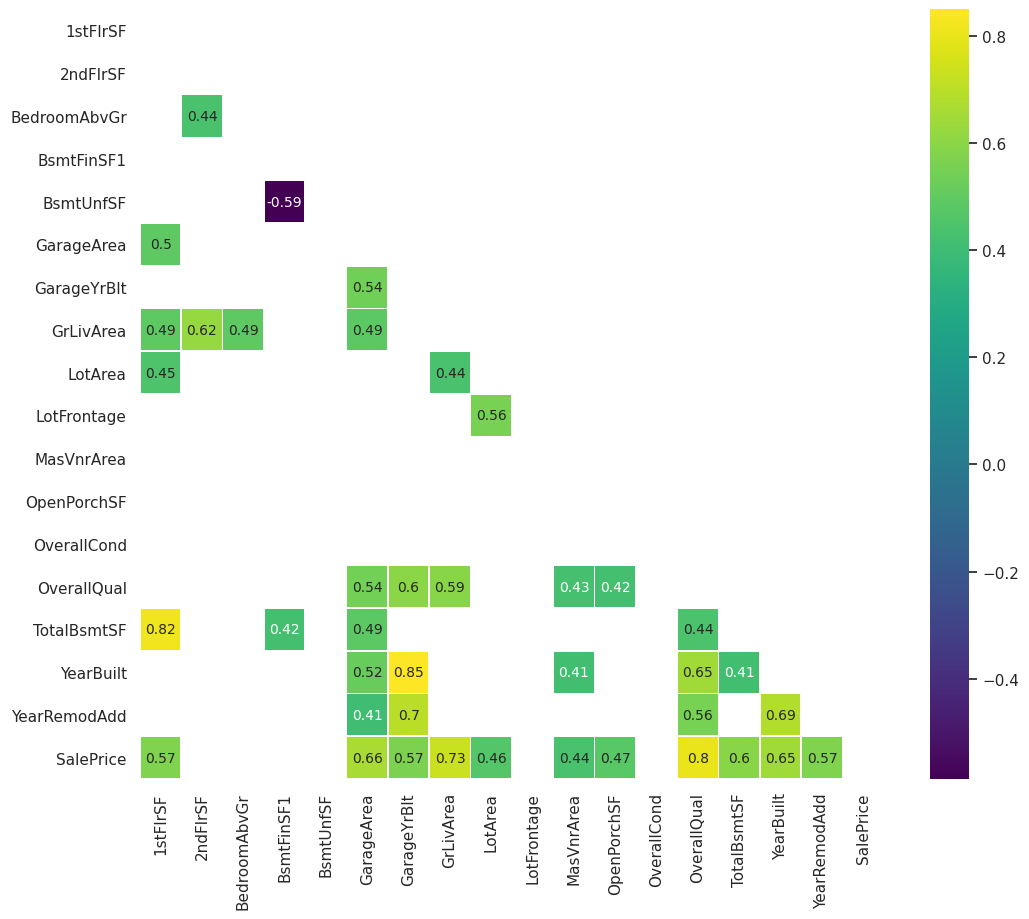



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



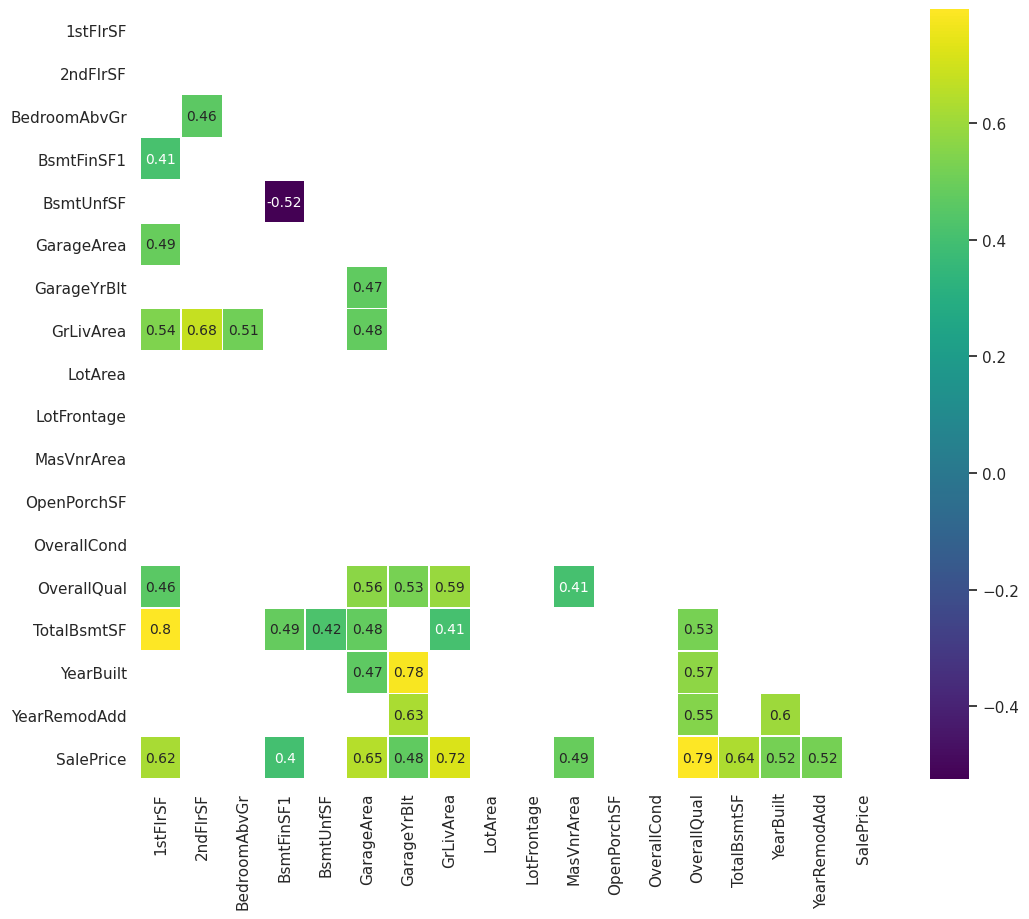



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



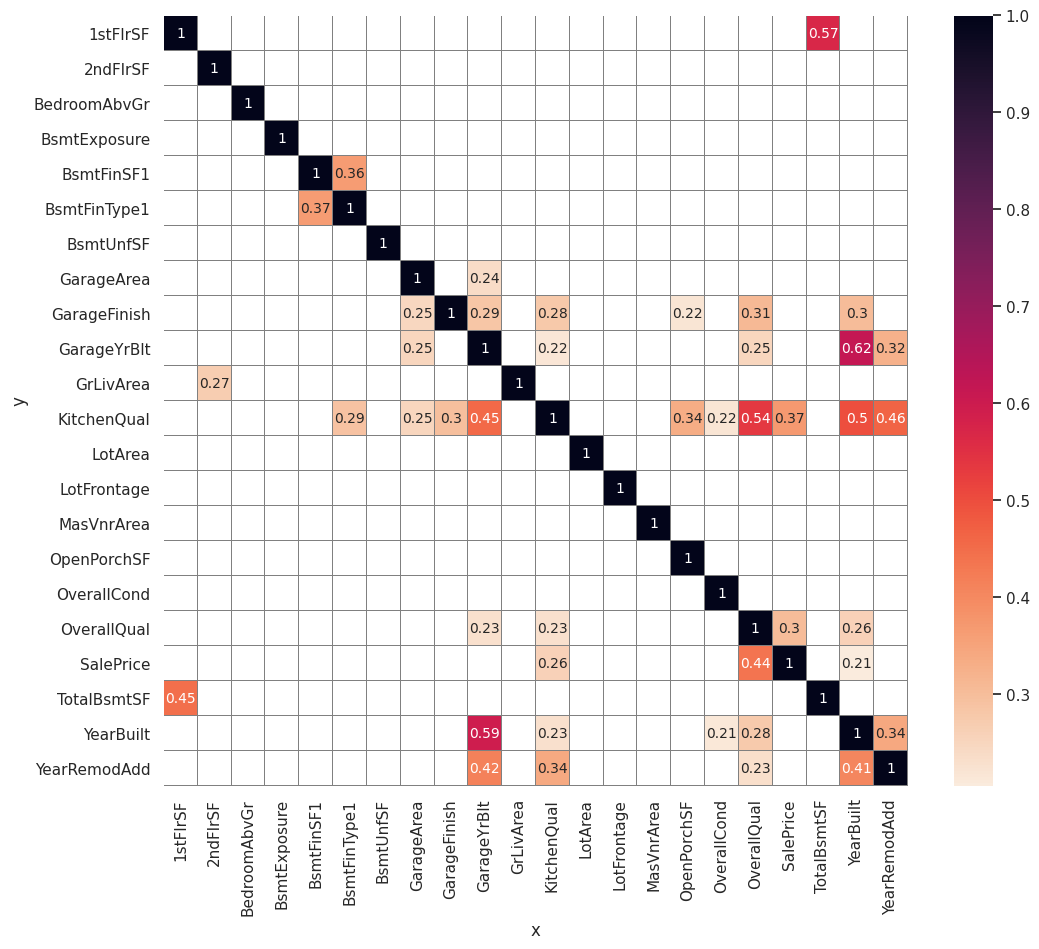

In [11]:
DisplayCorrAndPPS(df_corr_pearson = ts_corr_pearson,
                  df_corr_spearman = ts_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

In [1]:
import pandas as pd
import warnings
import numpy as np
import scipy.stats as stats
import seaborn as sns
from feature_engine.encoding import OrdinalEncoder
from feature_engine.outliers import Winsorizer

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,2.883272,Av,48,Unf,1774,774,Unf,2007.0,...,11694,90.0,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.000000,No,0,Unf,894,308,Unf,1962.0,...,6600,60.0,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.000000,No,713,ALQ,163,432,Unf,1921.0,...,13360,80.0,0.0,0,7,5,876,1921,2006,163500


In [2]:
def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise ValueError("There is a missing value in your dataset. Please handle that before getting into feature engineering.")

# Check for missing values in the dataset
check_missing_values(TrainSet)

In [11]:
import numpy as np
import scipy.stats as stats

def numerical_transformations(df, column):
    check_missing_values(df)
    transformed_df = pd.DataFrame(index=df.index)  # Use the original index

    # Check if the column exists in the DataFrame
    if column in df.columns:
        transformed_df[column] = df[column]
        transformed_df[f"{column}_log_e"] = np.log1p(df[column])
        transformed_df[f"{column}_log_10"] = np.log10(df[column].replace(0, np.nan))
        transformed_df[f"{column}_reciprocal"] = 1 / df[column].replace(0, np.nan)
        transformed_df[f"{column}_power"] = df[column]**2
        boxcox, _ = stats.boxcox(df[column].replace(0, np.nan).dropna())
        transformed_df[f"{column}_box_cox"] = np.nan  # Create empty column
        transformed_df.loc[~df[column].isna(), f"{column}_box_cox"] = boxcox  # Assign transformed values
        yeojohnson, _ = stats.yeojohnson(df[column].replace(0, np.nan))
        transformed_df[f"{column}_yeo_johnson"] = np.nan  # Create empty column
        transformed_df.loc[~df[column].isna(), f"{column}_yeo_johnson"] = yeojohnson  # Assign transformed values

    return transformed_df

# Test the numerical transformations on each column in TrainSet
for column in TrainSet.select_dtypes(include=['int', 'float']).columns:
    transformed_df = numerical_transformations(TrainSet, column)
    print(transformed_df.head(3))

   1stFlrSF  1stFlrSF_log_e  1stFlrSF_log_10  1stFlrSF_reciprocal  \
0      1828        7.511525         3.261976             0.000547   
1       894        6.796824         2.951338             0.001119   
2       964        6.872128         2.984077             0.001037   

   1stFlrSF_power  1stFlrSF_box_cox  1stFlrSF_yeo_johnson  
0         3341584          7.612997              7.585316  
1          799236          6.879148              6.857203  
2          929296          6.956402              6.933857  


ValueError: Must have equal len keys and value when setting with an iterable

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

## Summary
* The most suitable 

# Backup

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe
df_missing = df.copy()
df_missing['BsmtExposure'] = df_missing['BsmtExposure'].fillna('Missing')

# One-hot encode BsmtExposure
df_encoded = pd.get_dummies(df_missing, columns=['BsmtExposure'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlations with SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')

# Plot the correlations with SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_saleprice.values, y=correlation_with_saleprice.index, palette="viridis")
plt.title('Correlation of BsmtExposure Encoded Variables with SalePrice')
plt.xlabel('Correlation coefficient')
plt.ylabel('Encoded Variables')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

def correlation_to_sale_price_spearman(df, vars_to_study):
    """ Joint plots of variables vs SalePrice with Spearman correlation annotation """
    target_var = 'SalePrice'
    
    for col in vars_to_study:
        # Calculate Spearman correlation
        spearman_corr, p_value = spearmanr(df[col], df[target_var])
        
        # Create scatter plot with regression line
        g = sns.lmplot(data=df, x=col, y=target_var, line_kws={'color': 'red'})
        
        # Set the title and labels
        g.set_axis_labels(col, target_var, fontsize=15)
        g.fig.suptitle(f"{col} (Spearman: {spearman_corr:.2f}, p-value: {p_value:.2e})", fontsize=20, y=1.05)
        
        plt.show()
        print("\n\n")

In [ ]:
def correlation_to_sale_price_joint(df, vars_to_study):
    """  Joint plots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        x, y, hue = col, target_var, 'OverallQual'
        sns.jointplot(data=df, x=x, y=y, kind='hex')
        # sns.jointplot(data=df, x=x, y=y, hue=hue)
        plt.title(f"{col}", fontsize=20, y=1.3, x=-3)
        plt.show()
        print("\n\n")


correlation_to_sale_price_joint(df_eda, vars_to_study)

In [ ]:
def correlation_to_sale_price_scat(df, vars_to_study):
    """  scatterplots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.scatterplot(data=df, x=col, y=target_var, hue='OverallQual')
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_scat(df_eda, vars_to_study)

In [ ]:
def correlation_to_sale_price_lm(df, vars_to_study):
    """  Joint plots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        # fig, axes = plt.subplots(figsize=(8, 5))
        sns.lmplot(data=df, x=col, y=target_var)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_lm(df_eda, vars_to_study)

In [ ]:
def correlation_to_sale_price_hist(df, vars_to_study):
    """ Display correlation plot between variables and sale price """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.histplot(data=df, x=col, y=target_var)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_hist(df_eda, vars_to_study)

In [ ]:
non_integer_values_dict = {}

for column in df.columns:
    # Check if all values in the column are integers
    if not df[column].apply(lambda x: isinstance(x, int)).all():
        # Collect non-integer values, filtering out floats that don't start with '0.'
        non_integer_values = df[column][~df[column].apply(lambda x: isinstance(x, int))]
        non_integer_values = non_integer_values[~non_integer_values.apply(lambda x: isinstance(x, float) and not str(x).startswith('0.'))]
        # Use a set to ensure uniqueness
        unique_non_integer_values = set(non_integer_values)
        non_integer_values_dict[column] = list(unique_non_integer_values)

# Print the results
for column, values in non_integer_values_dict.items():
    print(f"Non-integer values in {column}: {values}")

In [ ]:
import matplotlib.pyplot as plt

# Fetch the top scores
pps_topscores = pps_matrix.iloc[19].sort_values(key=abs, ascending=False)[1:11]

# Print the values
print(pps_topscores)

# Plot the bar chart
plt.bar(x=pps_topscores.index, height=pps_topscores)
plt.xticks(rotation=90)
plt.title("Predictive Power Score", fontsize=20, y=1.05)

# Annotate the bars with the values
for index, value in enumerate(pps_topscores):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe
df_missing = df.copy()
df_missing['BsmtExposure'] = df_missing['BsmtExposure'].fillna('Missing')
df_missing['BsmtFinType1'] = df_missing['BsmtFinType1'].fillna('Missing')

# Calculate the mean SalePrice for each BsmtExposure category
mean_saleprice = df_missing.groupby('BsmtExposure')['SalePrice'].mean().reset_index()

# Pivot the dataframe for the heatmap
pivot_table = mean_saleprice.pivot("BsmtExposure", "SalePrice", "SalePrice")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Sale Price by BsmtExposure')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, linregress
from statsmodels.nonparametric.smoothers_lowess import lowess

# Sample mapping for KitchenQual
kitchen_qual_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1}

# Transform the KitchenQual values to numerical values in the DataFrame
df['KitchenQual_num'] = df['KitchenQual'].map(kitchen_qual_mapping)

# Display the count of each category in KitchenQual
print(df['KitchenQual'].value_counts())

# Function to plot a variable against SalePrice with Pearson and Spearman trendlines
def plot_with_trendlines(df, vars, target='SalePrice'):
    num_vars = len(vars)
    plt.figure(figsize=(16, 6 * num_vars))
    
    for i, var in enumerate(vars, 1):
        x = df[var]
        y = df[target]
        
        # Pearson correlation
        pearson_coef, _ = pearsonr(x, y)
        slope_pearson, intercept_pearson, _, _, _ = linregress(x, y)
        line_pearson = slope_pearson * x + intercept_pearson
        
        # Spearman correlation
        spearman_coef, _ = spearmanr(x, y)
        lowess_smoothed = lowess(y, x, frac=0.3)
        
        # Plotting
        plt.subplot(num_vars, 1, i)
        sns.scatterplot(x=x, y=y, label='Data points')
        
        plt.plot(x, line_pearson, color='red', label=f'Pearson trendline (r={pearson_coef:.2f})')
        plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='blue', label=f'Spearman trendline (r={spearman_coef:.2f})')
        
        plt.xlabel(var)
        plt.ylabel(target)
        plt.title(f'{var} vs {target} with Pearson and Spearman Trendlines')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage for multiple variables, including transformed KitchenQual
variables = ['YearBuilt', 'OverallQual', 'KitchenQual_num']
plot_with_trendlines(df, variables)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has been defined elsewhere

# Function to plot a variable against SalePrice with Pearson and Spearman trendlines
def plot_with_trendlines(df, var, target='SalePrice'):
    x = df[var]
    y = df[target]
    
    # Pearson correlation
    pearson_coef, _ = pearsonr(x, y)
    slope_pearson, intercept_pearson, _, _, _ = linregress(x, y)
    line_pearson = slope_pearson * x + intercept_pearson
    
    # Spearman correlation
    spearman_coef, _ = spearmanr(x, y)
    lowess_smoothed = lowess(y, x, frac=0.3)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, label='Data points')
    
    plt.plot(x, line_pearson, color='red', label=f'Pearson trendline (r={pearson_coef:.2f})')
    plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='blue', label=f'Spearman trendline (r={spearman_coef:.2f})')
    
    plt.xlabel(var)
    plt.ylabel(target)
    plt.title(f'{var} vs {target} with Pearson and Spearman Trendlines')
    plt.legend()
    plt.show()

# Example for 'YearBuilt'
plot_with_trendlines(df, 'YearBuilt')

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
plt.xlabel('KitchenQual')
plt.ylabel('SalePrice')
plt.title('SalePrice Distribution by KitchenQual')

plt.subplot(1, 2, 2)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('SalePrice Distribution by OverallQual')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Ensure plots are displayed in Jupyter notebook
%matplotlib inline

def correlation_to_sale_price_spearman(df, vars_to_study):
    """ Joint plots of variables vs SalePrice with Spearman correlation annotation """
    target_var = 'SalePrice'
    
    for col in vars_to_study:
        # Calculate Spearman correlation
        spearman_corr, p_value = spearmanr(df[col], df[target_var])
        
        # Create scatter plot with regression line
        g = sns.lmplot(data=df, x=col, y=target_var, line_kws={'color': 'red'})
        
        # Set the title and labels
        g.set_axis_labels(col, target_var, fontsize=15)
        g.fig.suptitle(f"{col} (Spearman: {spearman_corr:.2f}, p-value: {p_value:.2e})", fontsize=20, y=1.05)
        
        plt.show()

def plot_categorical_vs_sale_price(df, categorical_vars):
    """ Box plots of categorical variables vs SalePrice with mean curve overlay """
    target_var = 'SalePrice'
    
    for col in categorical_vars:
        plt.figure(figsize=(10, 6))
        
        # Create box plot
        sns.boxplot(x=df[col], y=df[target_var])
        
        # Calculate mean SalePrice for each category
        means = df.groupby(col)[target_var].mean()
        
        # Overlay mean SalePrice curve
        plt.plot(means.index, means.values, color='red', marker='o', linestyle='--', linewidth=2, markersize=8)
        
        # Add titles and labels
        plt.title(f"{col} vs {target_var}", fontsize=20, y=1.05)
        plt.xlabel(col, fontsize=15)
        plt.ylabel(target_var, fontsize=15)
        
        plt.xticks(rotation=45)
        
        plt.show()

In [ ]:
print(df_eda.head())
print(df_eda[vars_to_study].describe())
print(df_eda[categorical_vars].describe())

In [ ]:
correlation_matrix = df[['KitchenQual_Encoded', 'OverallQual']].corr()
print("Correlation between KitchenQual and OverallQual:")
print(correlation_matrix)

In [ ]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

In [ ]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

In [ ]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

In [ ]:
import pandas as pd
import ppscore as pps

# Load the DataFrame with your data
df = pd.read_csv("/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv")

# Calculate the PPS matrix
pps_matrix = pps.matrix(df)

# Filter the PPS matrix to show only the rows where 'y' is 'SalePrice'
pps_against_saleprice = pps_matrix[pps_matrix['y'] == 'SalePrice']

# Sort by the PPS score in descending order
pps_against_saleprice_sorted = pps_against_saleprice.sort_values(by='ppscore', ascending=False)

# Display the sorted PPS matrix
print(pps_against_saleprice_sorted)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Identify numeric variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

# Identify categorical variables and convert to numerical
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Update the list of numeric variables to include the new one-hot encoded columns
numeric_vars = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Ensure the list of variables is unique
numeric_vars = list(set(numeric_vars))

# Dictionary to store correlation results
correlations = {'Variable': [], 'Pearson': [], 'Spearman': []}

# Calculate correlations
for var in numeric_vars:
    if var != 'SalePrice':  # Exclude the target variable itself
        x = df_encoded[var]
        y = df_encoded['SalePrice']
        
        pearson_coef, _ = pearsonr(x, y)
        spearman_coef, _ = spearmanr(x, y)
        
        correlations['Variable'].append(var)
        correlations['Pearson'].append(pearson_coef)
        correlations['Spearman'].append(spearman_coef)

# Create a DataFrame with the correlation results
correlation_df = pd.DataFrame(correlations)

# Calculate the absolute values of the correlations
correlation_df['Abs_Pearson'] = correlation_df['Pearson'].abs()
correlation_df['Abs_Spearman'] = correlation_df['Spearman'].abs()

# Rank the variables based on absolute correlations
correlation_df['Pearson_Rank'] = correlation_df['Abs_Pearson'].rank(ascending=False)
correlation_df['Spearman_Rank'] = correlation_df['Abs_Spearman'].rank(ascending=False)

# Combine the ranks (average of Pearson and Spearman ranks)
correlation_df['Combined_Rank'] = (correlation_df['Pearson_Rank'] + correlation_df['Spearman_Rank']) / 2

# Sort the DataFrame based on the combined rank
correlation_df.sort_values(by='Combined_Rank', inplace=True)

# Display the correlation results
print(correlation_df)

# Extract the most related variable
most_related_variable = correlation_df.iloc[0]['Variable']
print(f"The most related variable to SalePrice is: {most_related_variable}")

In [ ]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)


In [ ]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman,
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.2, PPS_Threshold = 0.1,
                  figsize=(12,10), font_annot = 10)

In [ ]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

In [ ]:
plt.bar(x=corr_spearman[:10].index, height=corr_spearman[:10])
plt.title("Spearman Correlation", fontsize=20, y=1.05)
plt.show()

In [ ]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

In [ ]:
plt.bar(x=corr_pearson[:6].index, height=corr_pearson[:6])
plt.title("Pearson Correlation", fontsize=20, y=1.05)
plt.show()

In [ ]:
import pandas as pd

# The specified variables
variables = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
target = 'SalePrice'

# Assuming df_corr_pearson and df_corr_spearman are your correlation matrices
# Extract the correlation values for the specified variables
pearson_values = df_corr_pearson.loc[variables, target]
spearman_values = df_corr_spearman.loc[variables, target]

# Create a DataFrame to compare the values
comparison_df = pd.DataFrame({
    'Variable': variables,
    'Pearson Correlation': pearson_values.values,
    'Spearman Correlation': spearman_values.values
})

# Sort the DataFrame by 'Pearson Correlation' in descending order
sorted_comparison_df = comparison_df.sort_values(by='Pearson Correlation', ascending=False)

# Display the sorted DataFrame
print(sorted_comparison_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your data frame containing these variables and sales price
# Assuming `df` is your DataFrame containing the data

# Continuous variables
continuous_vars = ['YearBuilt', 'BsmtFinSF1', '1stFlrSF', 'OverallQual']

# Categorical variables
categorical_vars = ['KitchenQual', 'BsmtExposure']

# Plot continuous variables against sales price
plt.figure(figsize=(16, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='SalePrice', data=df)
    plt.title(f'{var} vs SalePrice')

# Plot categorical variables against sales price
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, len(continuous_vars) + i)
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.title(f'{var} vs SalePrice')

plt.tight_layout()
plt.show()

In [ ]:
### PPS
* We notice that 1stFlrSF is dominating while there are five other relevant variables to consider.
* We will perform a deeper analysis for the following data:
    * OverallQual     0.440962
    * KitchenQual     0.261966
    * YearBuilt       0.198485
    * GarageArea      0.187993
    * GarageYrBuilt   0.158649
    * YearRemodAdd    0.143284

### Pearson correlation
* OverallQual       (0.790982)
* GrLivArea         (0.708624)
* GarageArea        (0.623431)
* TotalBsmtSF       (0.613581)
* 1stFlrSF          (0.605852)
* KitchenQual       (-0.589189)

### Conclusion of first check for correlation
* We want to check if we can use one value in the same category (e.g area or quaility variables) to represent two or more similar to create an effecient variable to use
  in pipeline if possible. 
    * Category - Quality: We have two quality variables Overall Quality and Kitchen Quality we want to see if we have a strong between these ones, we have the following correlation;
      * 







* 1stFlrSF - mediate pps but a bit lower on correlation quite close between Pn and Sp.
* OverallQual -  lower pps but high correlation with sale price.
* BsmtExposure - low pps, and bsmt exposure is not even in the first 6 for pearson and spearman.
* YearBuilt - low pps and do not exist in pearson but medium in spearman.
* KitchenQual - low pps and negative for pearson, does not exist for spearman.
* BsmtFinSF1 - lowest pps does not exists for pearson nor spearman.


* BsmtExposure - Only PPS
* YearBuilt - PPS and Spearman
* KitchenQual - PPS and Pearson
* BsmtFinSF1 - Only PPS

* GrLivArea - Pearson and Spearman
* GarageArea - Pearson and Spearman
* TotalBsmtSF - Pearson and Spearman


### Spearman correlation
* OverallQual     0.809829
* GrLivArea       0.731310
* YearBuilt       0.652682
* GarageArea      0.649379
* TotalBsmtSF     0.602725
* 1stFlrSF        0.575408

<div style="display: flex;">
    <div style="margin-right: 20px;">
        <h2>PPS</h2>
        <table>
            <tr><th>Variable</th><th>Score</th></tr>
            <tr><td>OverallQual</td><td>0.441</td></tr>
            <tr><td>KitchenQual</td><td>0.262</td></tr>
            <tr><td>YearBuilt</td><td>0.198</td></tr>
            <tr><td>GarageArea</td><td>0.188</td></tr>
            <tr><td>GarageYrBuilt</td><td>0.159</td></tr>
            <tr><td>YearRemodAdd</td><td>0.143</td></tr>
        </table>
    </div>
    <div style="margin-right: 20px;">
        <h2>Pearson Correlation</h2>
        <table>
            <tr><th>Variable</th><th>Correlation</th></tr>
            <tr><td>OverallQual</td><td>0.791</td></tr>
            <tr><td>GrLivArea</td><td>0.709</td></tr>
            <tr><td>GarageArea</td><td>0.623</td></tr>
            <tr><td>TotalBsmtSF</td><td>0.614</td></tr>
            <tr><td>1stFlrSF</td><td>0.606</td></tr>
            <tr><td>KitchenQual</td><td>-0.589</td></tr>
        </table>
    </div>
    <div>
        <h2>Spearman Correlation</h2>
        <table>
            <tr><th>Variable</th><th>Correlation</th></tr>
            <tr><td>OverallQual</td><td>0.810</td></tr>
            <tr><td>GrLivArea</td><td>0.731</td></tr>
            <tr><td>YearBuilt</td><td>0.653</td></tr>
            <tr><td>GarageArea</td><td>0.649</td></tr>
            <tr><td>TotalBsmtSF</td><td>0.603</td></tr>
            <tr><td>1stFlrSF</td><td>0.575</td></tr>
        </table>
    </div>
</div>

* The most significant variables considering both Pearson and Spearman is: OverallQual, GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt (for Pearson correlation the last was KitchenQual but with a lower value hence the YearBuilt was identified as the 6th value).

## Compare pearson and spearman
* In this section we will check if there is any significant differences between pearson and spearman for the most significant variables.

## Summary comparison Pearson, Spearman and Power Predictive Score
* If we compare the power predictive score most with the equivavelt for pearson correlation we see the following differences:
    * 1stFlrSF PPS (1)  - PC (2) : PPS is calculated at a higher rank than PC.
    * OverallQual (2)   - PC (1) : PPS is calculated at a lower rank than PC.
    * BsmtExposure (3)  - PC (6) : PPS is calculated at a higher rank than PC.
    * YearBuilt (4)     - PC (4) : PPS is calculated at the same rank.
    * KitchenQual (5)   - PC (3) : PPS is calculated at a lower rank than PC.
    * BsmtFinSF1  (6)   - PC (5) : PPS is calculated at a lower rank than PC.

* We noticed that for the pearson and spearman correlation factor, the clearest difference in were the following order: 
    * YearBuilt     (0.13)
    * BsmtFinSF1    (0.09)
    * 1stFlrSF      (0.03)
    * KitchenQual   (0.02)
    * OverallQual   (0.02)
    * BsmtExposure  (0.01)  
    

## Grade variables according to significance
* For the data we are interested to know if the importance of each variable, meaning that values close to either either -1 or 1 are most significant. Sorted by Pearson , furhter analysis on discrepancy between Pearson and Spearman will be done in upcoming sections.
1. OverallQual  (Pn.  0.79)
2. 1stFlrSF     (Pn.  0.61)
3. KitchenQual  (Pn. -0.59)
4. YearBuilt    (Pn.  0.52)
5. BsmtFinSF1   (Pn.  0.39)
6. BsmtExposure (Pn. -0.31)

* OverallQual and KitchenQual
    * The quality variables show similarities between the Spearman curves for OverallQual and KitchenQual. For KitchenQual, a poor kitchen quality keeps the price down, resulting in a relatively flat price level between 1.0 and 3.0. However, beyond this point, the price increases significantly with higher quality levels.

    * The corresponding curve for OverallQual is closer to the Pearson trendline and indicates a more linear relationship between OverallQual and price. However, the Spearman trendlin e for OverallQual also has a flat appearance for quality levels 1 through 7, after which the price increases more rapidly with each increment in quality, similar to the KitchenQual variable.

    * Given these similarities, we believe it is possible to merge the Spearman curves and create a single quality variable for predicting sale price. This approach will be further analyzed in the next notebook, focusing on feature engineering.

Garage initial assessment
Upon initial examination, there is no strong indication that the GarageFinish feature has a significant correlation with the sale price. Additionally, the initial investigation into the relationship between garage area and sale price reveals a relatively low correlation.

Given that the size of the house typically exhibits a strong correlation with sale price, the comparatively weaker correlation observed with garage area suggests that other factors may have a more pronounced influence on the final sale price.

Further analysis is warranted to understand the nuanced relationship between garage attributes and sale price. This may include exploring potential outliers, considering interactions with other features, and employing more advanced analytical techniques to capture non-linear relationships effectively.

By delving deeper into these factors, we can gain a more comprehensive understanding of the garage's impact on property valuation and make more informed decisions regarding its significance in the overall pricing model.

In our analysis of basement exposure, we observed a noteworthy trend: properties with missing values for basement exposure tend to have lower sale prices. This suggests that the absence of basement exposure data may signal certain property characteristics that contribute to decreased market value.

Moreover, our examination revealed a subtle but discernible impact on sale price attributed to good living quarters within the basement. Properties featuring well-finished living spaces below ground level exhibited a slight positive influence on sale price, indicating a preference among buyers for quality basement amenities.

These findings underscore the importance of considering basement attributes in property valuation, as they can significantly influence market perceptions and ultimately affect sale prices. Further exploration into the nuances of basement features and their impact on property value is warranted to provide deeper insights for real estate decision-making.

Since the the sale prices range is lower and closest to "No" we will impute the missing values with  "No" for future calculations.Section 1 content

There is no clear connection between BsmtFinType and sales price. Since low-quality and average recreation rooms are essentially the same, the finish type has little effect. What can be discerned is that the quality of living quarters is influencing the price; however, this is most likely due to location rather than the finish type.

The sales price tends to increase with newer garages; however, this trend is likely influenced by property characteristics. Outliers were detected between 1993 and 1996, but subsequently, sales prices reverted to lower levels.

From this investigation we can that the following factors are most relevant: Quality, Space(Area), Age(YearBuilt), according to our Business requirement * 1. - "The client is interested in discovering how the house attributes correlate with the sale price". We can now know that these factors and the associated variables has the strongest correlation with the sale price. 

In [ ]:
unique_kitchen_qualities = df['KitchenQual'].unique()
print("Unique values in 'KitchenQual' column:", unique_kitchen_qualities)

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
